In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [3]:
#DATA IMPORT

#Reading the file from csv into pandas Dataframe
df = pd.read_csv('cleaned_data/police_killings_to_present.csv', encoding="latin1")
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,state names
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,Washington
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,Oregon
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,Kansas
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,California
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,Colorado


In [4]:
df.columns

Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera', 'state names'],
      dtype='object')

In [5]:
df_new = df.loc[:,["race", "date", "city", "state", "state names", "armed"]]
df_new.head()

,race,date,city,state,state names,armed
0,A,2015-01-02,Shelton,WA,Washington,gun
1,W,2015-01-02,Aloha,OR,Oregon,gun
2,H,2015-01-03,Wichita,KS,Kansas,unarmed
3,W,2015-01-04,San Francisco,CA,California,toy weapon
4,H,2015-01-04,Evans,CO,Colorado,nail gun


In [6]:
#DATA IMPORT

#Reading the file from csv into pandas Dataframe
df2 = pd.read_csv('cleaned_data/police_killings_to_present.csv', encoding="latin1")
df2.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,state names
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,Washington
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,Oregon
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,Kansas
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,California
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,Colorado


In [7]:
df2.columns

Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera', 'state names'],
      dtype='object')

In [8]:
df2_new = df2.loc[:,["race", "date", "city", "state", "state names", "armed"]]
unique_armed = df2_new['armed'].unique().copy()


In [9]:
df2_new['race'].replace({'H':'Hispanic','A':'Asian', 'W':'White','B':'Black'}, inplace=True)
df2_new = df2_new.rename(columns={'state names':'state_names'})

In [10]:
df2_new['date'] = pd.to_datetime(df2_new['date'])
df2_new['year'] = df2_new['date'].dt.year
df2_new.head()

,race,date,city,state,state_names,armed,year
0,Asian,2015-01-02,Shelton,WA,Washington,gun,2015
1,White,2015-01-02,Aloha,OR,Oregon,gun,2015
2,Hispanic,2015-01-03,Wichita,KS,Kansas,unarmed,2015
3,White,2015-01-04,San Francisco,CA,California,toy weapon,2015
4,Hispanic,2015-01-04,Evans,CO,Colorado,nail gun,2015


In [11]:
df2_new['date'] = pd.to_datetime(df2_new['date'])
df2_new['year'] = df2_new['date'].dt.year
df2_new.head()

,race,date,city,state,state_names,armed,year
0,Asian,2015-01-02,Shelton,WA,Washington,gun,2015
1,White,2015-01-02,Aloha,OR,Oregon,gun,2015
2,Hispanic,2015-01-03,Wichita,KS,Kansas,unarmed,2015
3,White,2015-01-04,San Francisco,CA,California,toy weapon,2015
4,Hispanic,2015-01-04,Evans,CO,Colorado,nail gun,2015


In [14]:
values_counts = df2_new['race'].value_counts()
values_counts

White       1041
Black        542
Hispanic     367
Asian         33
N             28
O             28
Name: race, dtype: int64

In [15]:
values_counts.index

Index(['White', 'Black', 'Hispanic', 'Asian', 'N', 'O'], dtype='object')

In [12]:
from sqlalchemy import create_engine
from sqlalchemy.ext.declarative import declarative_base

engine = create_engine('sqlite:///killings_db.sqlite')
conn = engine.connect()

df2_new.to_sql(name='police_killings_2015_to_present', con=engine, if_exists='replace', index=True)

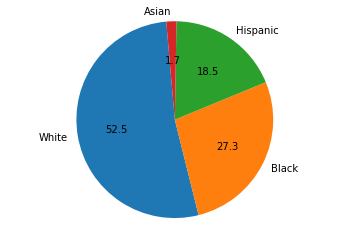

In [31]:
# import the pyplot library
import matplotlib.pyplot as plt

# The slice race distribution pie chart
#pieLabels = values_counts.index[0], values_counts.index[1], values_counts.index[2], values_counts.index[3]
pieLabels = [x for x in values_counts.index[:4]]

# Race Data
#raceData = [values_counts[0], values_counts[1], values_counts[2], values_counts[3]]
raceData = [x for x in values_counts[:4]]

colors  = ("blue", "yellow", "orange", "red")

fig, ax = plt.subplots()

# Draw the pie chart
ax.pie(raceData,
        labels=pieLabels,
        autopct='%1.1f',
        startangle=95,)

# Aspect ratio - equal means pie is a circle
ax.axis('equal')
plt.savefig("static/Images/pie_plots/race_pie.png")
plt.show()

In [17]:
df2_new['armed'].value_counts()

gun             1173
knife            319
unarmed          155
vehicle          136
undetermined     101
                ... 
pole               1
motorcycle         1
stapler            1
chain              1
oar                1
Name: armed, Length: 64, dtype: int64

In [18]:
# unarmed only
a = sum(df2_new["armed"] == "unarmed")
a

155

In [19]:
# boolean mask for undetermined
b = sum(df2_new["armed"] == "undetermined")
b

101

In [20]:
# everything but unarmed and undetermned
c = sum(~((df2_new["armed"] == "unarmed") | (df2_new["armed"] == "undetermined")))
c

1886

In [21]:
a + b + c

2142

In [22]:
df2_new.shape

(2142, 7)

In [23]:
df2_new.head()

,race,date,city,state,state_names,armed,year
0,Asian,2015-01-02,Shelton,WA,Washington,gun,2015
1,White,2015-01-02,Aloha,OR,Oregon,gun,2015
2,Hispanic,2015-01-03,Wichita,KS,Kansas,unarmed,2015
3,White,2015-01-04,San Francisco,CA,California,toy weapon,2015
4,Hispanic,2015-01-04,Evans,CO,Colorado,nail gun,2015


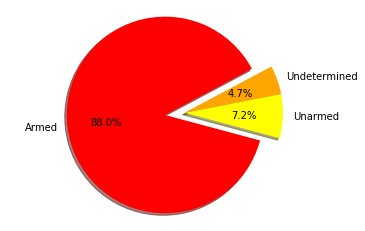

In [30]:
import matplotlib.pyplot as plt

labels = "Unarmed", "Undetermined", "Armed"
sizes = [a, b, c]
explode = (0, 0, 0.2)
colors = ["yellow", "orange", "red"]

fig, ax = plt.subplots()

ax.pie(x=sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=-15)
ax.axis("equal")
plt.savefig("static/Images/pie_plots/armed_unarmed_pie.png")
plt.show()

In [25]:
df2_new['year'].value_counts()

2015    991
2016    963
2017    188
Name: year, dtype: int64

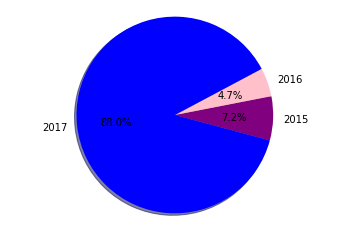

In [32]:
import matplotlib.pyplot as plt

labels = "2015", "2016", "2017"
sizes = [a, b, c]
explode = (0, 0, 0)
colors = ["purple", "pink", "blue"]

fig, ax = plt.subplots()

ax.pie(x=sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=-15)
ax.axis("equal")
plt.savefig("static/Images/pie_plots/year_pie.png")
plt.show()

In [27]:
df2['flee'].value_counts()

Not fleeing    1453
Car             318
Foot            254
Other            81
Name: flee, dtype: int64

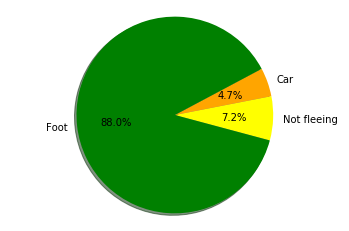

In [33]:
import matplotlib.pyplot as plt

labels = "Not fleeing", "Car", "Foot"
sizes = [a, b, c]
explode = (0, 0, 0)
colors = ["yellow", "orange", "green"]

fig, ax = plt.subplots()

ax.pie(x=sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=-15)
ax.axis("equal")
plt.savefig("static/Images/pie_plots/flee_pie.png")
plt.show()